In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
data = pd.read_csv('housing.csv')

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [48]:
data['ocean_proximity'] = data['ocean_proximity'].map({'<1H OCEAN': 0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY': 3, 'ISLAND': 4})

In [49]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [50]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [51]:
data.dropna(inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

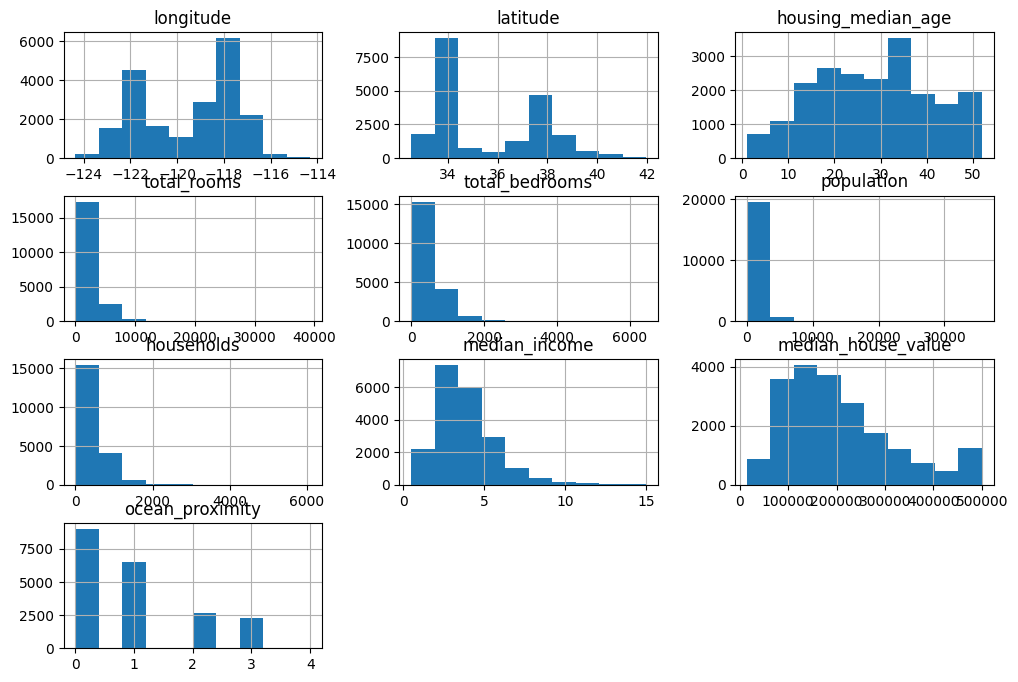

In [52]:
data.hist(figsize=(12,8))

In [53]:
data['Bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']


<Axes: >

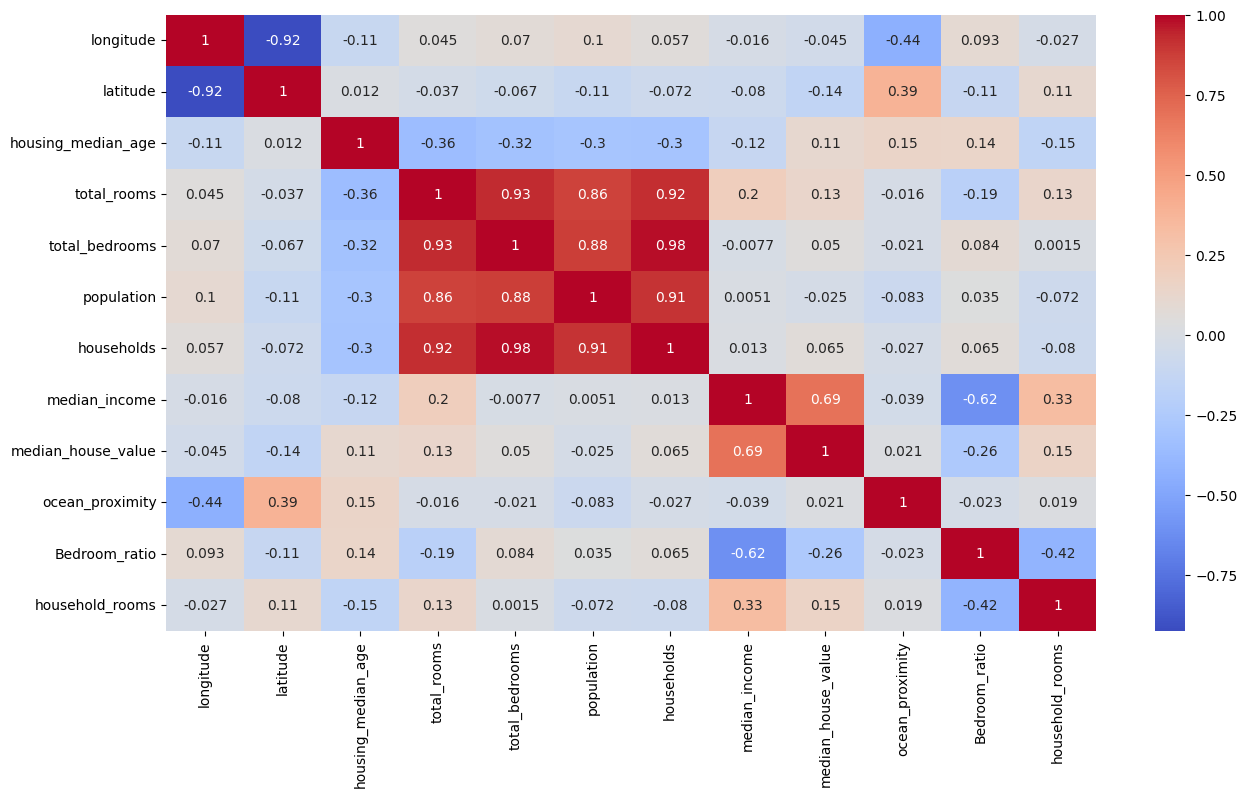

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

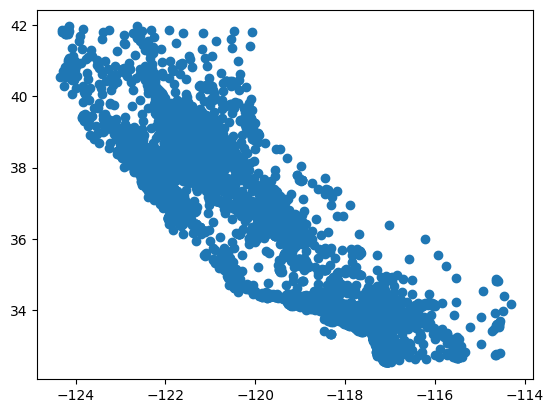

In [67]:
plt.scatter(y='latitude', x='longitude', data=data)
plt.show()

In [55]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Bedroom_ratio',
       'household_rooms'],
      dtype='object')

In [56]:
Corr= data.corr()
list_dict = Corr['median_house_value'].to_dict()
list_dict

{'longitude': -0.04539821933443104,
 'latitude': -0.1446382115762039,
 'housing_median_age': 0.1064320468761554,
 'total_rooms': 0.13329413480832375,
 'total_bedrooms': 0.0496861802473462,
 'population': -0.025299732287442214,
 'households': 0.06489354948814247,
 'median_income': 0.6883554753161126,
 'median_house_value': 1.0,
 'ocean_proximity': 0.020951950977175247,
 'Bedroom_ratio': -0.25588014941949866,
 'household_rooms': 0.1513440754584524}

In [57]:
threshold = 0.1
high_corr = []
for val in list_dict:
    if abs(list_dict[val]) > threshold:
        high_corr.append(val)
high_corr.remove("median_house_value")
high_corr

['latitude',
 'housing_median_age',
 'total_rooms',
 'median_income',
 'Bedroom_ratio',
 'household_rooms']

In [58]:
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>,
        <Axes: title={'center': 'Bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>]], dtype=object)

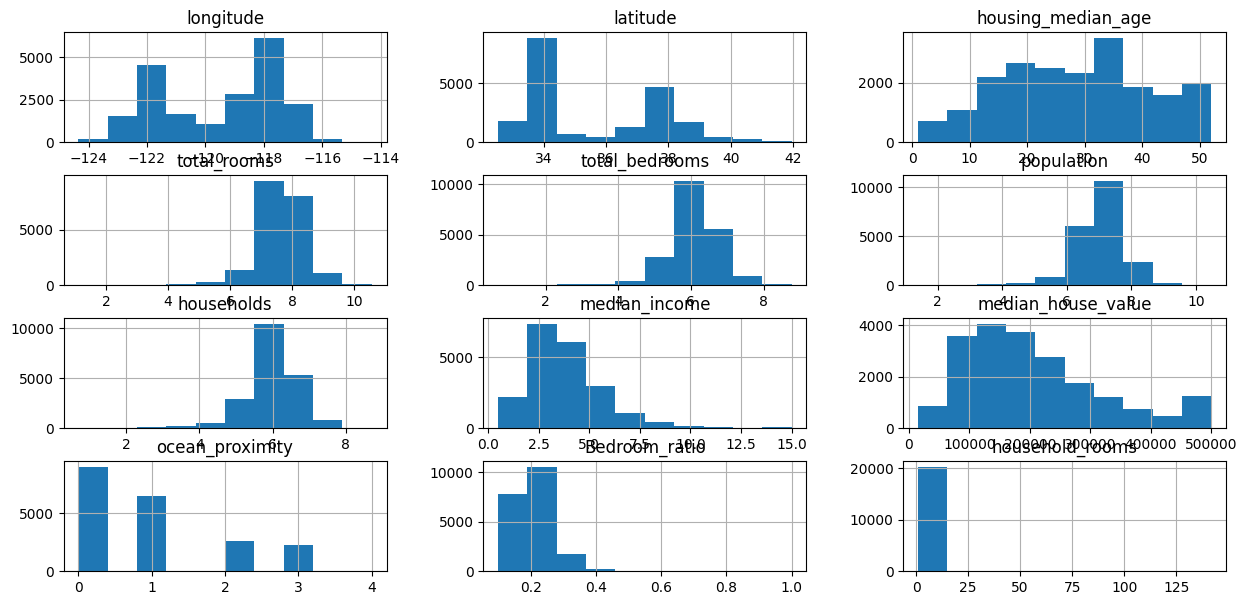

In [59]:
data.hist(figsize=(15,7))

## ML

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = data[high_corr]
y= data['median_house_value']

In [62]:


X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2)

In [63]:
from sklearn.linear_model import LinearRegression

reg =LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [64]:
reg.score(X_test,y_test)

0.5721545952093574

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
forest.score(X_test, y_test) #best model 

0.6801868277081631

In [24]:
import joblib

joblib.dump(forest, 'regression_model.pkl')

['regression_model.pkl']

In [68]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [100,200,300],
         'max_features': [2,4,6,7]}

forest = RandomForestRegressor()

grid_search = GridSearchCV(forest, param, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 7],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
best_forest = grid_search.best_estimator_

In [71]:
best_forest.score(X_test, y_test)

0.6882811129654189